## Problem 2.9

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import random
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
import matplotlib

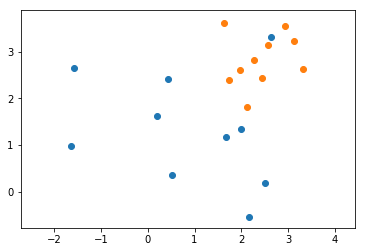

In [40]:
mean1 = [1, 1]
cov1 = [[2, 0], [0, 2]]
mean2 = [3, 3]
cov2 = [[1, 0], [0, 1]]

x1, y1 = np.random.multivariate_normal(mean1, cov1, 10).T
l1 = np.ones(len(x1))
x2, y2 = np.random.multivariate_normal(mean2, cov2, 10).T
l2 = -1*np.ones(len(x2))
plt.scatter(x1, y1)
plt.scatter(x2, y2)
plt.axis('equal')
plt.show()

In [43]:
def knn(n_neighbors):
    # prepare data
    X = np.concatenate((np.c_[x1,y1], np.c_[x2,y2]))
    y = np.concatenate((l1, l2))
    h = .02

    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
    clf.fit(X, y)

    # calculate min, max and limits
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h))

    # predict class using data and kNN classifier
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (n_neighbors))
    plt.show()

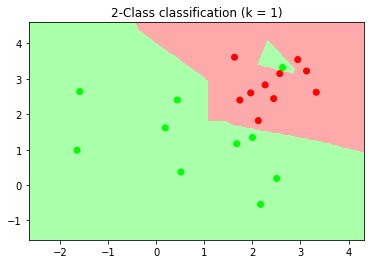

In [52]:
n_neighbors = 1
knn(n_neighbors)